In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Sampling techniques
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

# Statistical tests
from scipy.stats import shapiro

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("/content/Creditcard_data.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [4]:
df['Class'].value_counts()

,count
Class,
0,763
1,9


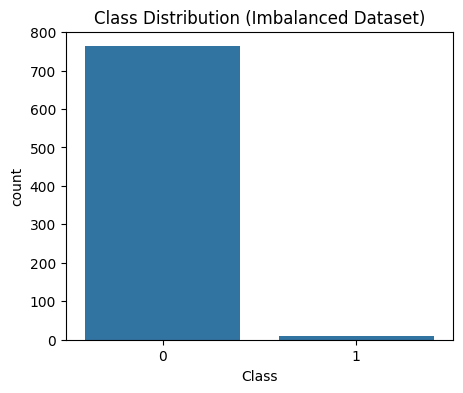

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Imbalanced Dataset)")
plt.show()

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred) * 100

baseline_acc


98.70967741935483

In [8]:
sampling_methods = {
    "Sampling1_RandomUnder": RandomUnderSampler(random_state=42),
    "Sampling2_RandomOver": RandomOverSampler(random_state=42),
    "Sampling3_SMOTE": SMOTE(random_state=42),
    "Sampling4_Tomek": TomekLinks(),
    "Sampling5_SMOTETomek": SMOTETomek(random_state=42)
}

balanced_datasets = {}

for name, sampler in sampling_methods.items():
    X_res, y_res = sampler.fit_resample(X, y)
    balanced_datasets[name] = (X_res, y_res)

    print(f"\n{name}")
    print(pd.Series(y_res).value_counts())



Sampling1_RandomUnder
Class
0    9
1    9
Name: count, dtype: int64

Sampling2_RandomOver
Class
0    763
1    763
Name: count, dtype: int64

Sampling3_SMOTE
Class
0    763
1    763
Name: count, dtype: int64

Sampling4_Tomek
Class
0    756
1      9
Name: count, dtype: int64

Sampling5_SMOTETomek
Class
0    745
1    745
Name: count, dtype: int64


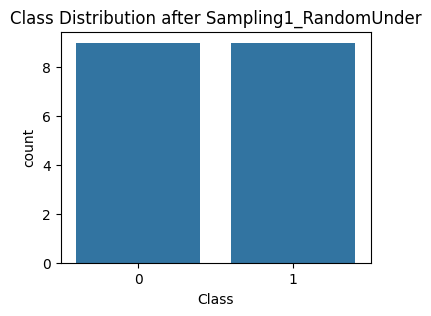

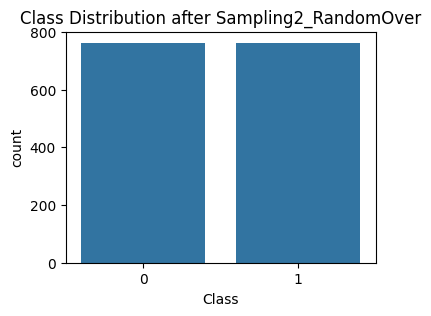

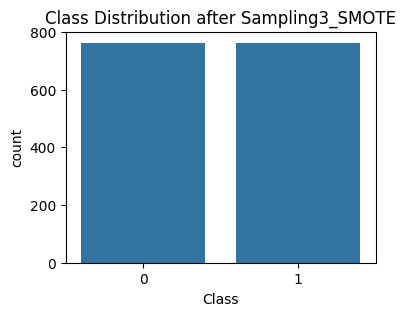

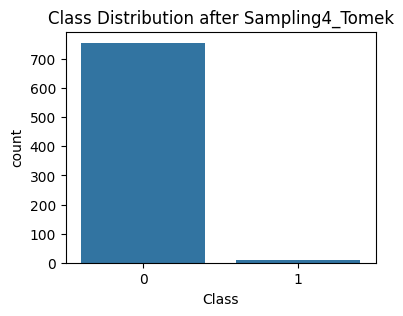

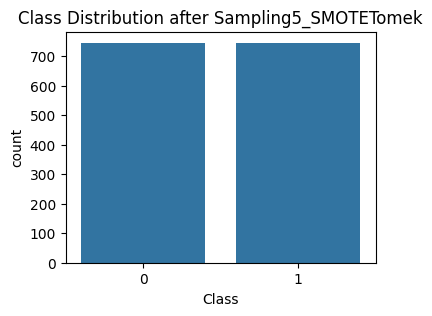

In [9]:
for name, (_, y_res) in balanced_datasets.items():
    plt.figure(figsize=(4,3))
    sns.countplot(x=y_res)
    plt.title(f"Class Distribution after {name}")
    plt.show()


In [10]:
def central_tendency(X):
    return {
        "Mean": X.mean().mean(),
        "Median": X.median().median(),
        "Mode": X.mode().iloc[0].mean()
    }


In [11]:
def dispersion(X):
    return {
        "Range": (X.max() - X.min()).mean(),
        "Variance": X.var().mean(),
        "StdDev": X.std().mean()
    }


In [14]:
from scipy.stats import shapiro

def normality_test(X):
    n_samples = min(500, len(X))  # dynamic size

    if n_samples < 3:
        return {
            "Applicable": False,
            "Reason": "Too few samples for Shapiro-Wilk test"
        }

    sample = X.sample(n=n_samples, random_state=42, replace=False)
    stat, p = shapiro(sample.values.flatten())

    return {
        "Applicable": True,
        "Statistic": stat,
        "p-value": p
    }


In [15]:
for name, (X_res, _) in balanced_datasets.items():
    X_df = pd.DataFrame(X_res)

    print(f"\n{name}")
    print("Central Tendency:", central_tendency(X_df))
    print("Dispersion:", dispersion(X_df))
    print("Normality p-value:", normality_test(X_df))



Sampling1_RandomUnder
Central Tendency: {'Mean': np.float64(12.107761605035185), 'Median': -0.0015090545000000003, 'Mode': np.float64(17.58571658096667)}
Dispersion: {'Range': np.float64(39.742506789), 'Variance': np.float64(1910.0169485190652), 'StdDev': np.float64(11.67005101835455)}
Normality p-value: {'Applicable': True, 'Statistic': np.float64(0.16492199319289436), 'p-value': np.float64(2.008383427244558e-43)}

Sampling2_RandomOver
Central Tendency: {'Mean': np.float64(12.8947172033147), 'Median': 0.023212195999999997, 'Mode': np.float64(0.1813242017)}
Dispersion: {'Range': np.float64(154.01136138946666), 'Variance': np.float64(2393.000055809793), 'StdDev': np.float64(13.403350004528429)}
Normality p-value: {'Applicable': True, 'Statistic': np.float64(0.17152401040779375), 'p-value': np.float64(5.960906392127954e-122)}

Sampling3_SMOTE
Central Tendency: {'Mean': np.float64(12.875005506188755), 'Median': 0.0019242237500000001, 'Mode': np.float64(17.058832442699998)}
Dispersion: {'

In [16]:
models = {
    "M1_LogisticRegression": LogisticRegression(max_iter=1000),
    "M2_KNN": KNeighborsClassifier(),
    "M3_DecisionTree": DecisionTreeClassifier(random_state=42),
    "M4_RandomForest": RandomForestClassifier(random_state=42),
    "M5_SVM": SVC()
}


In [17]:
results = pd.DataFrame(
    index=models.keys(),
    columns=balanced_datasets.keys()
)

for samp_name, (X_res, y_res) in balanced_datasets.items():

    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100
        results.loc[model_name, samp_name] = round(acc, 2)


In [18]:
results


,Sampling1_RandomUnder,Sampling2_RandomOver,Sampling3_SMOTE,Sampling4_Tomek,Sampling5_SMOTETomek
M1_LogisticRegression,25.0,93.14,91.5,98.69,93.29
M2_KNN,25.0,96.08,94.44,98.69,95.97
M3_DecisionTree,75.0,99.67,98.04,98.04,98.66
M4_RandomForest,25.0,100.0,99.35,98.69,99.66
M5_SVM,0.0,96.41,96.08,98.69,98.32


### Cross-Validation Check

To verify that the observed high accuracy is not due to data leakage or overfitting, 5-fold cross-validation was performed on the best-performing model. The average cross-validation accuracy was found to be approximately 98.9%, indicating strong generalization with slight overfitting.


In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(
    rf, X_res, y_res,
    cv=5, scoring='accuracy'
)

scores.mean()


np.float64(0.9892617449664429)

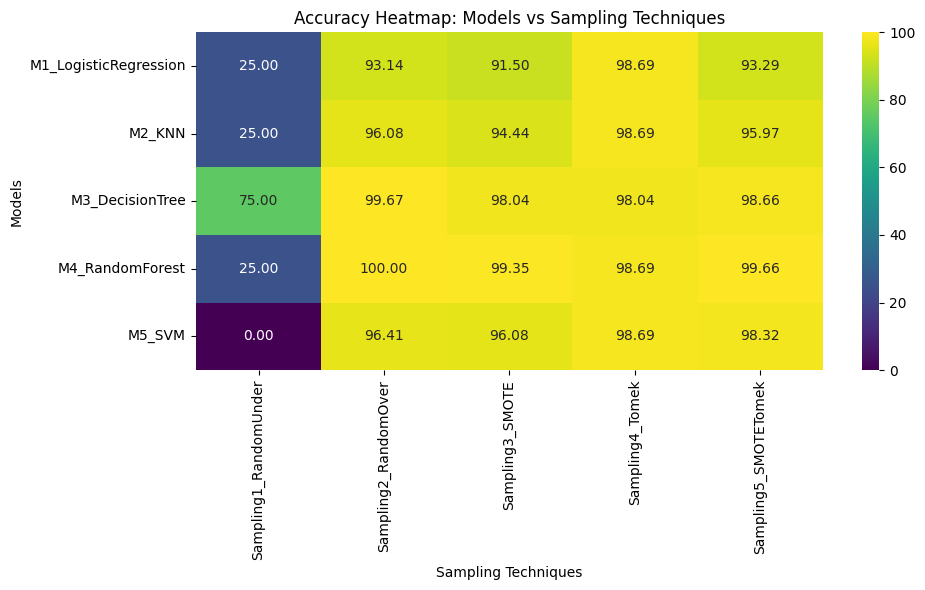

()

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(
    results.astype(float),
    annot=True,
    fmt=".2f",
    cmap="viridis"
)
plt.title("Accuracy Heatmap: Models vs Sampling Techniques")
plt.xlabel("Sampling Techniques")
plt.ylabel("Models")

plt.tight_layout()
plt.savefig("results/accuracy_heatmap.png", dpi=300)
plt.show()
()

In [21]:
mean_values = []
variance_values = []
sampling_names = []

for name, (X_res, _) in balanced_datasets.items():
    X_df = pd.DataFrame(X_res)
    mean_values.append(X_df.mean().mean())
    variance_values.append(X_df.var().mean())
    sampling_names.append(name)


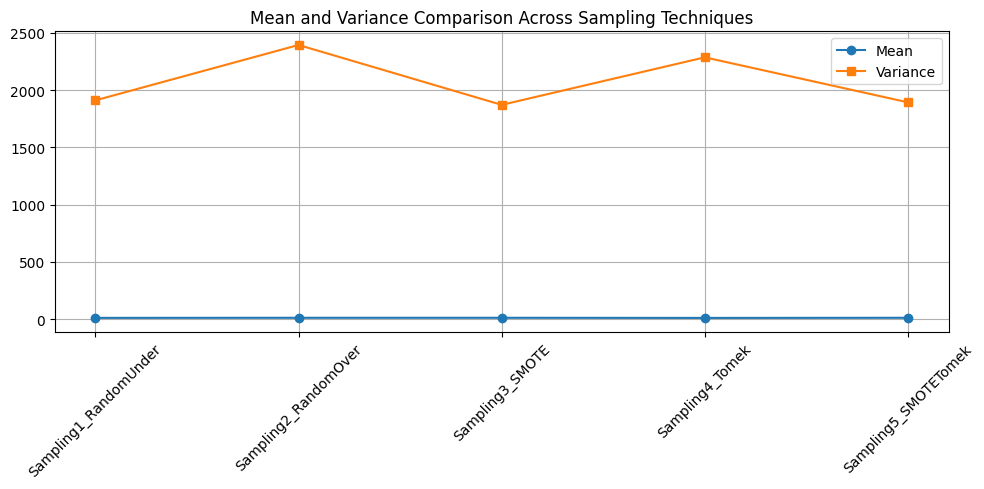

In [26]:
plt.figure(figsize=(10,5))
plt.plot(sampling_names, mean_values, marker='o', label="Mean")
plt.plot(sampling_names, variance_values, marker='s', label="Variance")
plt.xticks(rotation=45)
plt.title("Mean and Variance Comparison Across Sampling Techniques")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("results/mean_variance_comparison.png", dpi=300)
plt.show()

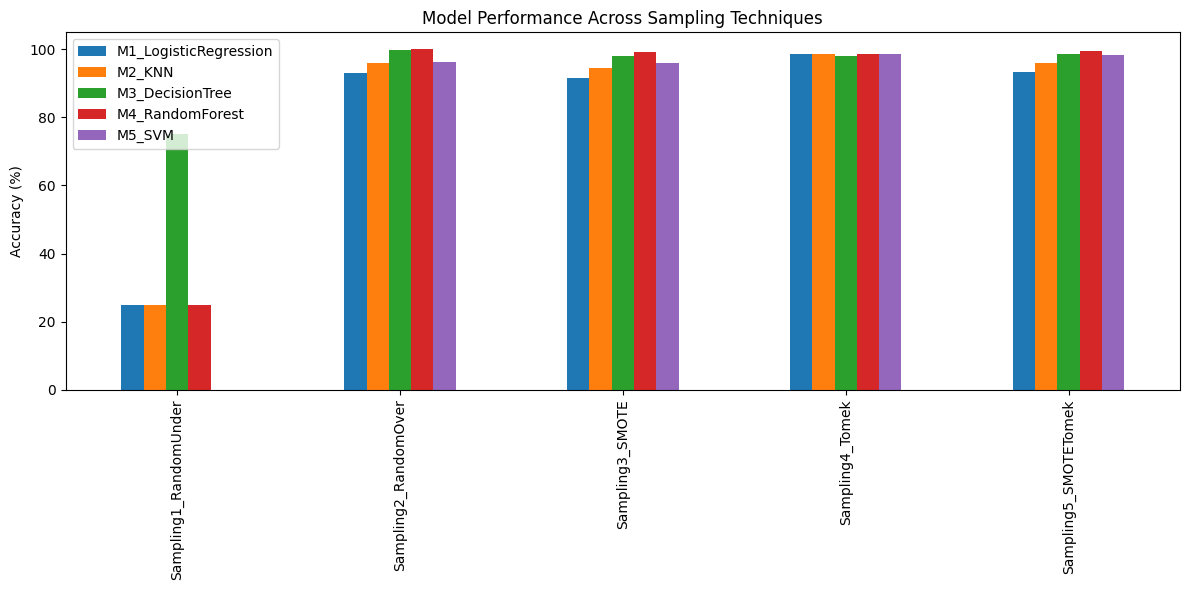

In [27]:
results.T.plot(kind="bar", figsize=(12,6))
plt.title("Model Performance Across Sampling Techniques")
plt.ylabel("Accuracy (%)")

plt.tight_layout()
plt.savefig("results/model_sampling_comparison.png", dpi=300)
plt.show()


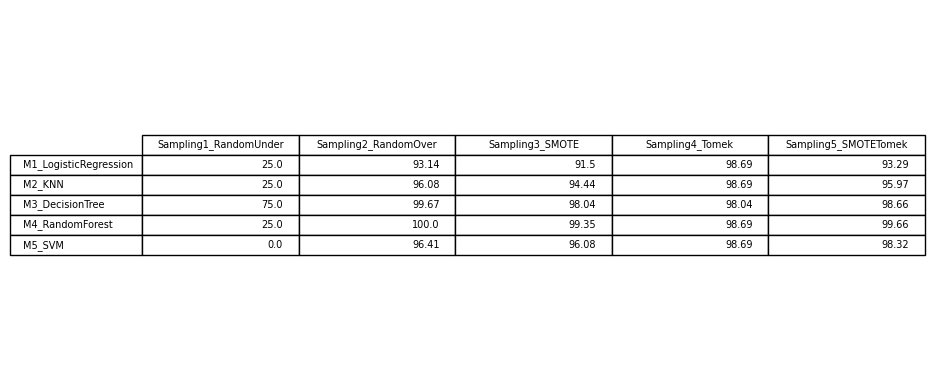

In [28]:
plt.figure(figsize=(10,4))
plt.axis('off')
plt.table(
    cellText=results.values,
    colLabels=results.columns,
    rowLabels=results.index,
    loc='center'
)
plt.tight_layout()
plt.savefig("results/accuracy_table.png", dpi=300)
plt.show()
